#### 1) Delivery_time -> Predict delivery time using sorting time 
#### 2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## 1) Delivery_time -> Predict delivery time using sorting time 

In [544]:
import pandas as pd #ridge
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [545]:
Delivery= pd.read_csv("delivery_time.csv")


In [546]:
Delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [547]:
Delivery=Delivery.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"})

In [548]:
Delivery["Log_Delivery_Time"]= np.log(Delivery["Delivery_Time"])  # log transformation used

In [549]:
# Delivery=Delivery.drop("Delivery_Time",axis=1)

In [550]:
Delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Delivery_Time      21 non-null     float64
 1   Sorting_Time       21 non-null     int64  
 2   Log_Delivery_Time  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes


In [551]:
Delivery.corr()    # finding out the correlation

,Delivery_Time,Sorting_Time,Log_Delivery_Time
Delivery_Time,1.000000,0.825997,0.981502
Sorting_Time,0.825997,1.000000,0.843177
Log_Delivery_Time,0.981502,0.843177,1.000000


In [552]:
import seaborn as sns

C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_Delivery_Time', ylabel='Density'>

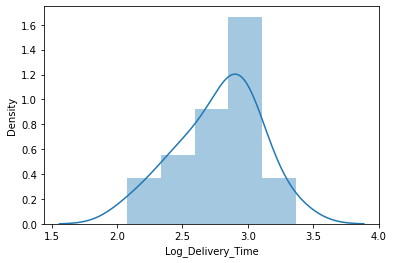

In [553]:
sns.distplot(Delivery["Log_Delivery_Time"])

C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

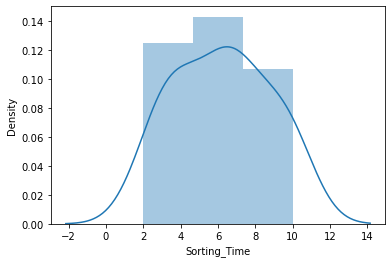

In [554]:
sns.distplot(Delivery["Sorting_Time"])

#### For both  Sorting time and Delhivery Time the data is normal distribution

In [555]:
x=Delivery.iloc[:,1:2]   # independent variable

In [556]:
x

,Sorting_Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [557]:
y=Delivery.iloc[:,-1]

In [558]:
y

0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: Log_Delivery_Time, dtype: float64

In [559]:
# Train test model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=0)

In [560]:
x_train

,Sorting_Time
19,7
4,10
2,6
5,6
16,6
9,9
7,3
17,7
3,9
0,10


In [561]:
y_train

19    2.880882
4     3.367296
2     2.983153
5     2.731115
16    2.621039
9     2.931194
7     2.251292
17    2.896464
3     3.178054
0     3.044522
15    2.700018
12    2.814210
Name: Log_Delivery_Time, dtype: float64

In [562]:
y_test

8     2.884801
13    2.442347
20    3.068053
1     2.602690
11    2.374906
10    2.987196
14    2.487404
18    2.079442
6     2.944439
Name: Log_Delivery_Time, dtype: float64

In [563]:
from sklearn.linear_model import LinearRegression

In [564]:
clf = LinearRegression()  # fitting the model
clf.fit(x_train,y_train)

LinearRegression()

In [565]:
y_pred=clf.predict(x_test)

In [566]:
y_pred

array([3.20068232, 2.4211648 , 2.64388409, 2.53252444, 2.53252444,
       2.97796303, 2.4211648 , 2.30980515, 2.86660338])

In [567]:
clf.score(x_test,y_test)

0.5864790926751444

In [583]:
# plt.plot(Delivery["y"],y_pred)
# plt.scatter(Delivery["Sorting_Time"],Delivery["Log_Delivery_Time"],edgecolors="face")

In [496]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [497]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)   
print("rsme=",rmse)
print("r2=",r2)

rsme= 0.20371943892973743
r2= 0.5864790926751444


In [498]:
mean_squared_error = np.mean((y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  0.04150160979784701


In [499]:
# Putting together the coefficient and their corrsponding variable names 
regressor_coefficient=pd.DataFrame()
regressor_coefficient["Columns"] = x_train.columns 
regressor_coefficient['Coefficient Estimate'] = pd.Series(regressor.coef_) 
print(regressor_coefficient)

        Columns  Coefficient Estimate
0  Sorting_Time              0.120681


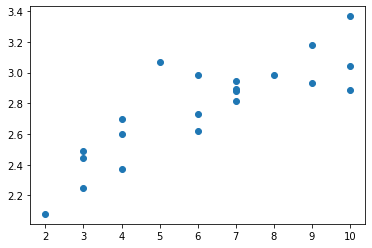

In [500]:
plt.scatter(Delivery['Sorting_Time'],Delivery['Log_Delivery_Time'])

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

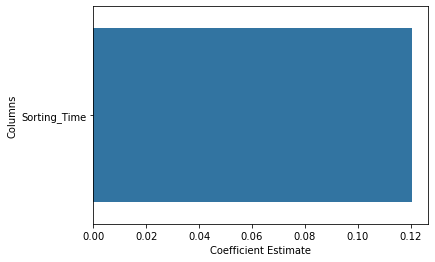

In [501]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=regressor_coefficient)

In [502]:
# Fitting a linear regression
import statsmodels.formula.api as smf

In [503]:
Time= Delivery.rename(columns={"Delivery Time": "Delhivery_Time","Sorting Time": "Sorting_Time"},inplace=True,errors="ignore")

In [504]:
Delivery

,Delivery_Time,Sorting_Time,Log_Delivery_Time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


In [307]:
model=smf.ols("Log_Delivery_Time~ Sorting_Time",data=Delivery).fit()    # dependent~independent

In [308]:
model

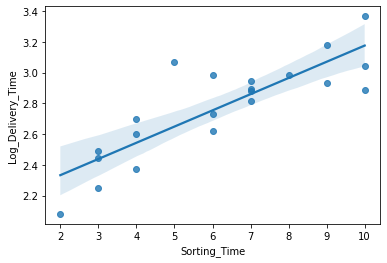

In [312]:
sns.regplot(x="Sorting_Time", y="Log_Delivery_Time", data= Delivery);

In [313]:
model.params           # Positively correlated data which means delivery time increases as sorting time increases

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [314]:
print(model.tvalues, '\n', model.pvalues)        # t and p values

Intercept       20.601357
Sorting_Time     6.836088
dtype: float64 
 Intercept       1.857343e-14
Sorting_Time    1.592708e-06
dtype: float64


In [315]:
(model.rsquared,model.rsquared_adj) # r square

(0.7109478980584187, 0.6957346295351776)

#### Interpretation:
1. R square value as 71% seems that the model has less errors
2. R square value is neither too high nor too low and hence suggests that the model is proper and there is no overfitting or underfitting in the model.
3.The coefficients are statistically significant because their p-values are all less than 0.05. 

In [316]:
Manual_predict= (6.582734)+(1.649020)*5    # equation  (y=beta0 + x.beta1)
Manual_predict

14.827834

In [317]:
newdata=pd.Series([5,10])  ## Prediction

In [318]:
data_pred= pd.DataFrame(newdata, columns=["Sorting_Time"])
data_pred

,Sorting_Time
0,5
1,10


In [319]:
model.predict(data_pred)

0    2.649130
1    3.176888
dtype: float64

## 2) Salary_hike -> Build a prediction model for Salary_hike


In [515]:
Salaries=pd.read_csv("Salary_Data.csv")

In [516]:
Salaries.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [517]:
Salaries["log_Salary"] = np.log(Salaries['Salary'])

In [518]:
Salaries=Salaries.drop("Salary",axis=1)

In [519]:
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   log_Salary       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [520]:
Salaries.corr()

,YearsExperience,log_Salary
YearsExperience,1.000000,0.965384
log_Salary,0.965384,1.000000


C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

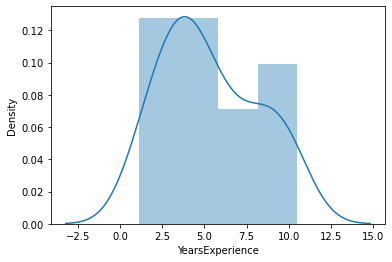

In [521]:
sns.distplot(Salaries["YearsExperience"])

C:\Users\91705\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

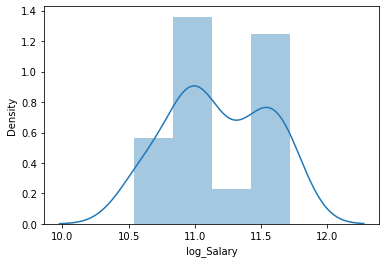

In [522]:
sns.distplot(Salaries["log_Salary"])

#### Both Salary and Years of experience is showing Normal Distribution

In [523]:
x=Salaries.iloc[:,0:1]  # independent Variable

In [524]:
y=Salaries["log_Salary"]

In [525]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [526]:
y

0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.710727
Name: log_Salary, dtype: float64

In [527]:
# Train test model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [528]:
x_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [529]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [530]:
y_test

2     10.538237
28    11.714976
13    10.952227
10    11.054344
26    11.669664
24    11.603049
Name: log_Salary, dtype: float64

In [531]:
from sklearn.linear_model import LinearRegression

In [532]:
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [533]:
y_pred=clf.predict(x_test)

In [534]:
y_pred

array([10.70722087, 11.81118277, 11.03339143, 11.00830139, 11.71082259,
       11.61046242])

In [535]:
clf.score(x_test,y_test)

0.9580405787769721

In [536]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [537]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,x_test)   
print("rsme=",rmse)
print("r2=",r2)

rsme= 0.08969189063514685
r2= -168.4836578662434


In [538]:
mean_squared_error = np.mean((y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

Mean squared Error on test set :  0.008044635245707142


In [539]:
# Putting together the coefficient and their corrsponding variable names 
regressor_coefficient=pd.DataFrame()
regressor_coefficient["Columns"] = x_train.columns 
regressor_coefficient['Coefficient Estimate'] = pd.Series(regressor.coef_) 
print(regressor_coefficient)

           Columns  Coefficient Estimate
0  YearsExperience              0.120681


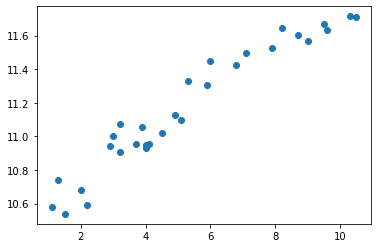

In [540]:
plt.scatter(Salaries['YearsExperience'],Salaries['log_Salary'])

<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

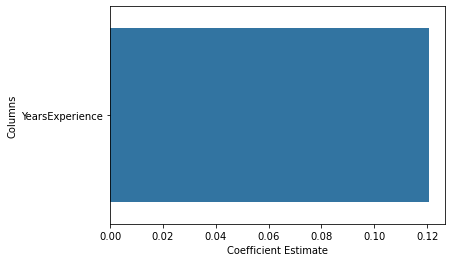

In [541]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=regressor_coefficient)

In [542]:
# Fitting a linear regression

In [363]:
import statsmodels.formula.api as smf
model1 = smf.ols("log_Salary~YearsExperience",data=Salaries).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='log_Salary'>

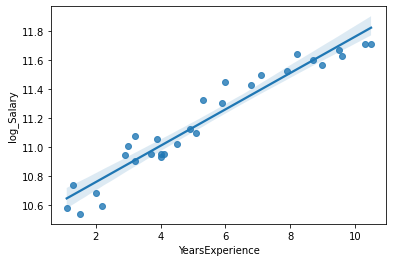

In [364]:
sns.regplot(x="YearsExperience",y="log_Salary",data=Salaries)

In [365]:
model1.params       # Positively correlated data which means delivery time increases as sorting time increases

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [366]:
print(model1.tvalues, "\n", model1.pvalues)    # pvalues and t values

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [367]:
(model1.rsquared,model1.rsquared_adj)

(0.9319671194084194, 0.9295373736730057)

#### Interpretation:
1. R square value as 93% shows that the model has less errors
2. R square value is neither too high nor too low and hence suggests that the model is proper and there is no overfitting or underfitting in the model.
3.The coefficients are statistically significant because their p-values are all less than 0.05. 

In [368]:
Manual_predict= (25792.200199)+(9449.962321)*5    # equation  (y=beta0 + x.beta1)
Manual_predict

73042.01180400001

In [369]:
newdata1= pd.Series([25000,3])# Prediction of data

In [85]:
data_predict=pd.DataFrame(newdata1,columns=["YearsExperience"])

In [86]:
model1.predict(data_predict)

0    2.362749e+08
1    5.414209e+04
dtype: float64